# CA3 - Data Driven Model
- Student Name: **Vinicius Moura Barros**
- Student Number: **T00244396**
## **Allocation of marks**

Stages 1,2,3   Total 30%

Ideally your dataset will not need a lot of work. Marks going for the choosing,  training, evaluation and refining of model primarily


---



Stage 4,5       Total 60%

Choose your model

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


Train and evaluate your model. Refine the model or choose another estimator or approach?

Do not overwrite cells and add commentry between iterations.



---




Stage 6         Total 10%

## **Stage 0**
### Preparation of Environment
This section outlines what needs to be installed on the Python environment before this notebook can be executed.
Python3 is being used for this project. The following packages need to be installed (e.g.: via `pip install`):
- scikit-learn
- pandas


 ### Importing the libraries

In [80]:
import pandas as pd
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn import tree

# **Stage 1**

### Background
Overwatch is a team-based multiplayer first-person shooter developed and published by Blizzard Entertainment. Overwatch League is the official professional and competitive Overwatch league, where teams compete against each other through the year.

A regular official match is composed of a multiple games (or maps), whereas the first team to have 3 games (maps) won, wins the match. Each game is played in a different map, and each map has its own characteristics, which can be advantageous or disadvantageous to a team, depending on their playstyle.

The team who loses a map has the chance of choosing what next map they want to play. And this is exactly the type of question that this notebook will try to answer: given a team and this team's adversary, what map should they choose next, in order to increase their chances of winning the match?

### Describe Data

The dataset chosen for this notebook was a list of previous matches from Overwatch League.
All Overwatch League datasets can be found in [Overwatch League official statslab](https://overwatchleague.com/en-us/statslab), and the one used for this notebook can be downloaded exactly from [this URL](https://assets.blz-contentstack.com/v3/assets/blt321317473c90505c/blta8c8b99af29af2be/63f51f804f98c853eaf0983b/match_map_stats.csv.zip).

The dataset contains almost 14.000 rows with data about official matches that happened from 11/2018 until 05/2022.


### Loading Dataset
As the dataset may not be available during the execution of this notebook, a copy can be found in ./data/overwatch_match_map_stats.csv. By loading it from a local disk, it will also make the loading process faster.

In [81]:
DATASET = 'data/overwatch_match_map_stats.csv'
df = pd.read_csv(DATASET)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13901 entries, 0 to 13900
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   round_start_time              13901 non-null  object 
 1   round_end_time                13901 non-null  object 
 2   stage                         13901 non-null  object 
 3   match_id                      13901 non-null  int64  
 4   game_number                   13901 non-null  int64  
 5   match_winner                  13901 non-null  object 
 6   map_winner                    13901 non-null  object 
 7   map_loser                     13901 non-null  object 
 8   map_name                      13901 non-null  object 
 9   map_round                     13901 non-null  int64  
 10  winning_team_final_map_score  13901 non-null  int64  
 11  losing_team_final_map_score   13901 non-null  int64  
 12  control_round_name            4270 non-null   object 
 13  A

In [82]:
df.head()

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,01/11/18 00:12,01/11/18 00:20,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,Los Angeles Valiant,San Francisco Shock,75.61505,0.00000,0.000000,240.000,NaN,NaN,2,0
1,01/11/18 00:22,01/11/18 00:27,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,Los Angeles Valiant,San Francisco Shock,75.64960,75.61505,125.750570,0.000,NaN,NaN,3,2
2,01/11/18 00:34,01/11/18 00:38,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,250.492000,240.000,NaN,NaN,2,0
3,01/11/18 00:40,01/11/18 00:44,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,225.789030,250.492,NaN,NaN,2,2
4,01/11/18 00:46,01/11/18 00:49,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,36.396057,250.492,NaN,NaN,4,2


# **Stage 2**

### Justification for the property that you would like the model to predict.

As described in the Background section, during a game, the team that lost a match have the chance of choosing the next map to be played. This is an important decision as by analyzing historical data, the team might take advantage of existing data about previous match to maximize their chances of winning the next match (and eventually the game).

And this is exactly the type of question that this notebook will try to answer: given a team and this team’s adversary, what map should they choose next, in order to increase their chances of winning the match?

Based on team_one_name, team_two_name, map_name and map_winner, we will try to predict what map should the team choose next.



# **Stage 3**

### Cleaning the data, linking datasets etc..



As the main objective is to predict what map to chose, we don't need all the data present in the dataset, so we will filter it to have only the data necessary to train the model.


In [83]:
df = df[['team_one_name', 'team_two_name', 'map_name', 'map_winner', 'map_loser', 'winning_team_final_map_score',
         'losing_team_final_map_score']]

In [84]:
df.head()

,team_one_name,team_two_name,map_name,map_winner,map_loser,winning_team_final_map_score,losing_team_final_map_score
0,Los Angeles Valiant,San Francisco Shock,Dorado,Los Angeles Valiant,San Francisco Shock,3,3
1,Los Angeles Valiant,San Francisco Shock,Dorado,Los Angeles Valiant,San Francisco Shock,3,3
2,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,Los Angeles Valiant,San Francisco Shock,4,4
3,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,Los Angeles Valiant,San Francisco Shock,4,4
4,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,Los Angeles Valiant,San Francisco Shock,4,4


Also, as the data present in the dataset is mainly strings for team names and map names, we need to convert it to numerical data, so the model can understand it. For this, we will use the LabelEncoder from scikit-learn.

The helper functions below will help us to convert the data to numerical data and also to convert it back to the original data whenever needed.

In [85]:
default_dict = defaultdict(LabelEncoder)


# we need to convert the categorical data into numerical data so the model can understand it
def categorize_df(df: pd.DataFrame):
    return df.apply(lambda x: default_dict[x.name].fit_transform(x))


def prettify_df(categorized_df: pd.DataFrame):
    return categorized_df.apply(lambda x: default_dict[x.name].inverse_transform(x))


def get_map_winner_name(map_winner: int):
    res = default_dict['map_winner'].inverse_transform([map_winner])
    return res.item(0)



# **Stage 4**
Choose and train Estimator.

To help finding an estimator, the [Scikit-Learn Choosing the Right Estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) was used as a guide.

The initial estimator chosen for this notebook is the Decision Tree Classifier, however if want to experiment with other classification methods like LogisticRegression and see if one is more accurate than other.

In [86]:
# These are the features to be taken into consideration when training the model
features = ['team_one_name', 'team_two_name', 'map_name']

# And target is what we want to be able to predict
target = 'map_winner'

random_state = 42
# percentage of the dataset to be used for testing (the remainder will be used for training)
test_size = 0.5

categorized_df = categorize_df(df)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(categorized_df[features], categorized_df[target],
                                                    test_size=test_size, random_state=random_state)

print(len(X_train), len(X_test), len(y_train), len(y_test))



6950 6951 6950 6951


#### DecisionTreeClassifier
Let's create an estimator with the Decision Tree Classifier

In [87]:
# create a decision tree classifier
estimator = DecisionTreeClassifier()

# fit the model on the training data
estimator.fit(X_train, y_train)

# make predictions on the testing data
y_pred = estimator.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7216227880880449


By using the DecisionTreeClassifier, we got an accuracy of more than 72% for the test (not used in the training) data, which is already impressive.

# **Stage 5**
### Evaluate your model and revisit 4...repeat..
Now that we have a base-line for comparison (72% of accuracy), let's experiment other estimators and see if we can get a better accuracy with other known classification models

In [88]:
estimators_to_be_tested = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SGDClassifier': SGDClassifier(),
    'SVC': SVC(max_iter=10000),
}

for name, estimator_instance in estimators_to_be_tested.items():
    estimator_instance.fit(X_train, y_train)
    temp_y_pred = estimator_instance.predict(X_test)
    accuracy = accuracy_score(y_test, temp_y_pred)
    print(f"Accuracy for {name}: {accuracy}")

Accuracy for LogisticRegression: 0.12041432887354338
Accuracy for RandomForestClassifier: 0.712415479787081
Accuracy for KNeighborsClassifier: 0.5110056107034959
Accuracy for SGDClassifier: 0.07653575025176233
Accuracy for SVC: 0.29247590274780605


As we can observe on the results above, given the exact same training/test data, the Decision Tree has still better results than the other ones. So, for now, we will keep using the Decision Tree Classifier.

### Fine-tuning
Now that we have decided to continue using the Decision Tree Classifier, let's try to fine-tune it to see if we can get a better accuracy.
We'll loop through possible percentages of test_sizes (from 1% until 100%) and see if we can get a relevant accuracy without overfitting the model.

<AxesSubplot:title={'center':'Accuracy by size of trained data'}, xlabel='% of dataset for training', ylabel='Accuracy %'>

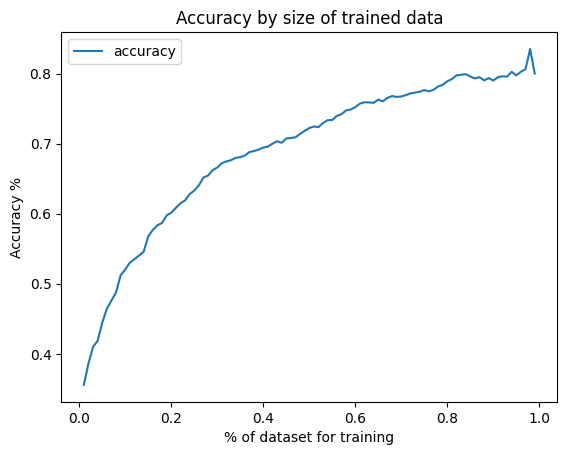

In [89]:
# These are the features to be taken into consideration when training the model
features = ['team_one_name', 'team_two_name', 'map_name']

# And target is what we want to be able to predict
target = 'map_winner'

random_state = 42

# percentage of the dataset to be used for testing (the remainder will be used for training)
test_sizes = range(1, 100)

results = {'test_size': [], 'train_size':[], 'accuracy': []}

for size in test_sizes:
    size = size/100
    categorized_df = categorize_df(df)

    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(categorized_df[features], categorized_df[target],
                                                        test_size=size, random_state=random_state)

    # create a decision tree classifier
    estimator = DecisionTreeClassifier()

    # fit the model on the training data
    estimator.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = estimator.predict(X_test)

    # evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # store the results
    results['test_size'].append(size)
    results['train_size'].append(1-size)
    results['accuracy'].append(accuracy)


# let's plot the results
results_df = pd.DataFrame(results)
results_df.plot(x='train_size', y='accuracy', title='Accuracy by size of trained data', kind='line', xlabel='% of dataset for training', ylabel='Accuracy %')

In [90]:
results_df

,test_size,train_size,accuracy
0,0.01,0.99,0.800000
1,0.02,0.98,0.835125
2,0.03,0.97,0.806220
3,0.04,0.96,0.802513
4,0.05,0.95,0.797414
...,...,...,...
94,0.95,0.05,0.444419
95,0.96,0.04,0.418659
96,0.97,0.03,0.409819
97,0.98,0.02,0.385892


As we can observe in the Line diagram and in the table above, the accuracy of the model is affected depending on the size of the dataset used for training. And can have an accuracy of 79% using 81% of the dataset for training. 81% is the percentages that  will be utilized for training our model, as it provide a good enough accuracy without causing overfitting.

So we'll change from 50% to 81% the size of the dataset used for training, with an improvement of 7% in accuracy.

So let's train our model again (next cell), but this time using 81% of the dataset for training.



In [91]:
# These are the features to be taken into consideration when training the model
features = ['team_one_name', 'team_two_name', 'map_name']

# And target is what we want to be able to predict
target = 'map_winner'

random_state = 42

# percentage of the dataset to be used for testing (the remainder will be used for training)
test_size = 0.19  # (81% used for training)

results = {'test_size': [], 'train_size':[], 'accuracy': []}

categorized_df = categorize_df(df)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(categorized_df[features], categorized_df[target],
                                                    test_size=test_size, random_state=random_state)
# create a decision tree classifier
estimator = DecisionTreeClassifier()

# fit the model on the training data
estimator.fit(X_train, y_train)

# make predictions on the testing data
y_pred = estimator.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.7922028766086299


### Randomly testing
Let's randomly pick 10 rows from the dataset and see if the model can predict the winner of the map correctly.

In [92]:
random_to_check = [random.randint(0, len(df)) for _ in range(10)]

to_test = categorized_df.loc[random_to_check]

to_test['prediction'] = estimator.predict(to_test[features])

# check the last 2 columns to compare map_winner and prediction
print(to_test[['team_one_name', 'team_two_name', 'map_winner', 'prediction']])

       team_one_name  team_two_name  map_winner  prediction
2549              11              3          11          11
9445              13             17          13          13
9441              13             17          22          17
2462               1             11           1           1
3173               3             17          17          17
12642              6             15          15          15
4180               7              5           5           5
3470              15             11          15          15
1149              17              7           7           7
11475              9             14          14          14


## Stage 5.5 Tool for teams
Despite not being explicitly requested, at this stage, we'll provide a tool for teams to be able to use the model to predict what map to choose next.
Users of this tool will be asked 2 inputs: ID of their team and ID of the opponent team.

Then the tool will take all existing maps and based on the user inputs will try to predict the winner (if any) of each map.
This is essentially the final goal of the project, so we'll be using the model we trained and refined from the previous stages.

In [191]:
print("List of Teams Available")
teams = df['team_one_name'].unique()
for i, name in enumerate(teams):
    print(f"{i} - {name}")

List of Teams Available
0 - Los Angeles Valiant
1 - Los Angeles Gladiators
2 - Shanghai Dragons
3 - Seoul Dynasty
4 - Dallas Fuel
5 - Florida Mayhem
6 - London Spitfire
7 - Houston Outlaws
8 - Philadelphia Fusion
9 - New York Excelsior
10 - Boston Uprising
11 - San Francisco Shock
12 - Hangzhou Spark
13 - Toronto Defiant
14 - Atlanta Reign
15 - Chengdu Hunters
16 - Guangzhou Charge
17 - Paris Eternal
18 - Washington Justice
19 - Vancouver Titans
20 - Vegas Eternal
21 - Seoul Infernal


### Choosing teams
Here we'll ask users to input their team and their opponent team.


In [192]:
my_team, opponent_team = None, None

while my_team is None:
    team = int(input(f"What is your team? (0-{len(teams)-1})"))
    if 0 <= team < len(teams):
        print(f"Your team is {teams[team]}")
        my_team = team
    else:
        print("Invalid choice, please try again")

while opponent_team is None:
    team = int(input(f"What is your opponent team?(0-{len(teams)-1}) It must not be {teams[my_team]} "))
    if 0 <= team < len(teams):
        print(f"Your opponent team is {teams[team]}")
        opponent_team = team
    else:
        print("Invalid choice, please try again")

Your team is Florida Mayhem
Your opponent team is London Spitfire


### Computing Predictions
Here we'll compute the predictions for each map, and we'll show the results to the user.

In [194]:
unique_maps = list(df['map_name'].unique())

# Let's build a dict w/ all unique maps and our team (as team one) and the opponent team (as team two)
dict_data = {
    'map_name': unique_maps,
    'team_one_name': [teams[my_team]] * len(unique_maps),
    'team_two_name': [teams[opponent_team]] * len(unique_maps)
}

# Let's make a copy of the original DF
temp_df = df.copy(deep=True)

# Let's append the data we want to predict
temp_df = temp_df.append(pd.DataFrame(dict_data), ignore_index=True)

# Let's categorize the data, so we can use it to predict
temp_df = categorize_df(temp_df)

# Let's create a new DF only w/ the data to be predicted (but still categorized)
prediction_only_df = temp_df.tail(len(unique_maps))

# calculate the prediction for each map
prediction_winner = estimator.predict(prediction_only_df[features])

prediction_only_df = prettify_df(prediction_only_df)
prediction_only_df['prediction_winner'] = prediction_winner
prediction_only_df['prediction_winner'] = default_dict['map_winner'].inverse_transform(prediction_only_df['prediction_winner'])
final_prediction_df = prediction_only_df[features+['prediction_winner']].reset_index()
display(final_prediction_df)


,index,team_one_name,team_two_name,map_name,prediction_winner
0,13901,Florida Mayhem,London Spitfire,Dorado,Florida Mayhem
1,13902,Florida Mayhem,London Spitfire,Temple of Anubis,London Spitfire
2,13903,Florida Mayhem,London Spitfire,Ilios,Florida Mayhem
3,13904,Florida Mayhem,London Spitfire,Numbani,London Spitfire
4,13905,Florida Mayhem,London Spitfire,Eichenwalde,Florida Mayhem
5,13906,Florida Mayhem,London Spitfire,Junkertown,Florida Mayhem
6,13907,Florida Mayhem,London Spitfire,Oasis,London Spitfire
7,13908,Florida Mayhem,London Spitfire,Horizon Lunar Colony,Florida Mayhem
8,13909,Florida Mayhem,London Spitfire,Lijiang Tower,London Spitfire
9,13910,Florida Mayhem,London Spitfire,Volskaya Industries,draw


# **Stage 6**
***Present results and Conclusions***


In this project we were able to build a model that can predict the winner of a map based on the teams playing and the map being played.

